#Creating the Dataset

In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Define the dataset size
dataset_size = 30

# Define the possible values for each column
prime_membership = np.random.choice(['Yes', 'No'], size=dataset_size)
purchase_history = np.random.randint(0, 3000, size=dataset_size)  # Generate random numbers between 0 and 3000
engagement = np.random.choice(['Electronics', 'Digital', 'Fashion', 'Groceries', 'Lifestyle'], size=dataset_size)
location = np.random.choice(['Inside US', 'Outside US'], size=dataset_size)

# Create the DataFrame
df = pd.DataFrame({
    'prime_membership': prime_membership,
    'purchase_history': purchase_history,
    'engagement': engagement,
    'location': location
})

# Add a new column based on the conditions
df['credit_eligible'] = (
    (df['prime_membership'] == 'Yes') &
    (df['purchase_history'] > 1600) &
    (df['location'] == 'Inside US')
).map({True: 'Yes', False: 'No'})

# Display the dataset
df


,prime_membership,purchase_history,engagement,location,credit_eligible
0,Yes,2324,Digital,Outside US,No
1,No,1184,Digital,Inside US,No
2,Yes,459,Electronics,Inside US,No
3,Yes,21,Digital,Outside US,No
4,Yes,2300,Lifestyle,Outside US,No
5,No,747,Digital,Inside US,No
6,Yes,2904,Groceries,Outside US,No
7,Yes,474,Groceries,Outside US,No
8,Yes,1082,Groceries,Outside US,No
9,No,2558,Groceries,Inside US,No


#Exploratory Data Analysis

       purchase_history
count         30.000000
mean        1641.933333
std          904.100045
min           21.000000
25%          804.000000
50%         1852.500000
75%         2353.250000
max         2904.000000


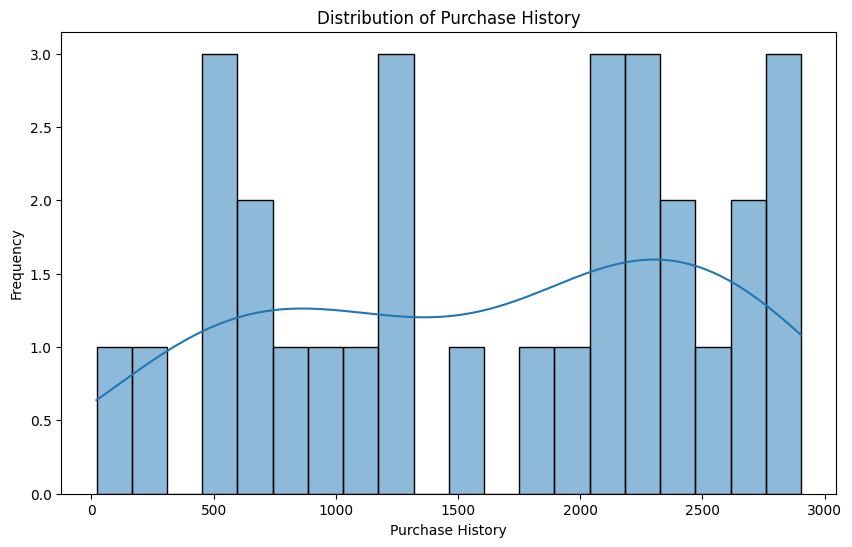

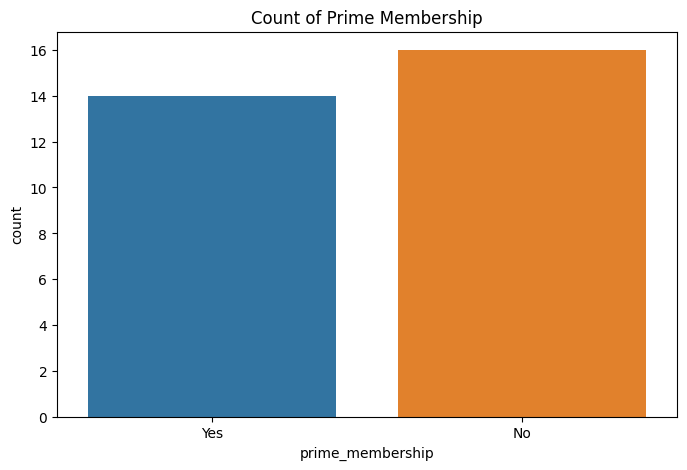

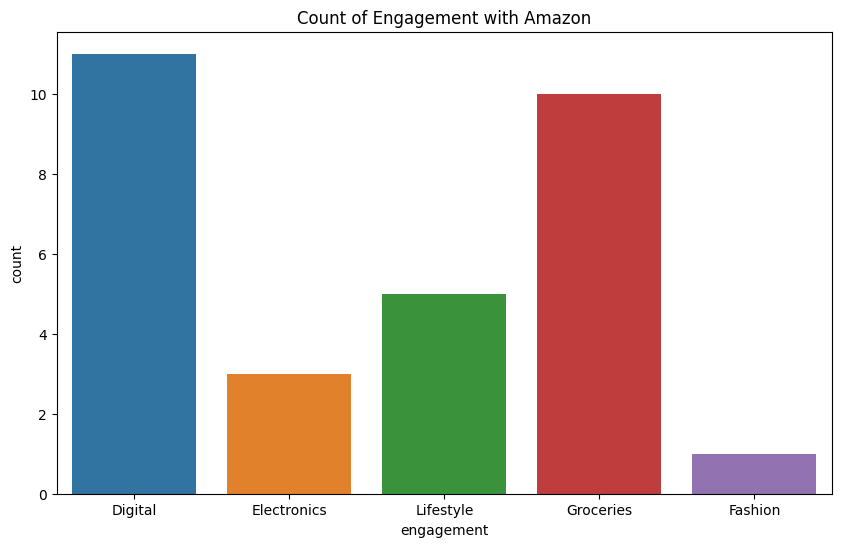

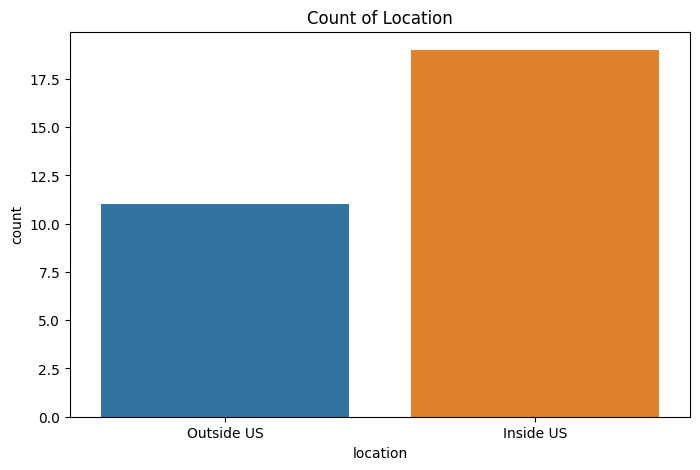

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics of the dataset
print(df.describe())

# Visualize the distribution of Purchase History
plt.figure(figsize=(10, 6))
sns.histplot(df['purchase_history'], bins=20, kde=True)
plt.title('Distribution of Purchase History')
plt.xlabel('Purchase History')
plt.ylabel('Frequency')
plt.show()

# Countplot for Prime Membership
plt.figure(figsize=(8, 5))
sns.countplot(x='prime_membership', data=df)
plt.title('Count of Prime Membership')
plt.show()

# Countplot for Engagement with Amazon
plt.figure(figsize=(10, 6))
sns.countplot(x='engagement', data=df)
plt.title('Count of Engagement with Amazon')
plt.show()

# Countplot for Location
plt.figure(figsize=(8, 5))
sns.countplot(x='location', data=df)
plt.title('Count of Location')
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Encode categorical variables
label_encoder = LabelEncoder()
df['prime_membership'] = label_encoder.fit_transform(df['prime_membership'])
df['engagement'] = label_encoder.fit_transform(df['engagement'])
df['location'] = label_encoder.fit_transform(df['location'])
df['credit_eligible'] = label_encoder.fit_transform(df['credit_eligible'])

# Define features and target variable
X = df[['prime_membership', 'purchase_history', 'engagement', 'location']]
y = df['credit_eligible']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Train models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Evaluate models
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Display model accuracies
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")

Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 0.6666666666666666
SVM Accuracy: 0.8333333333333334


#Prediction of Credit Eligibility

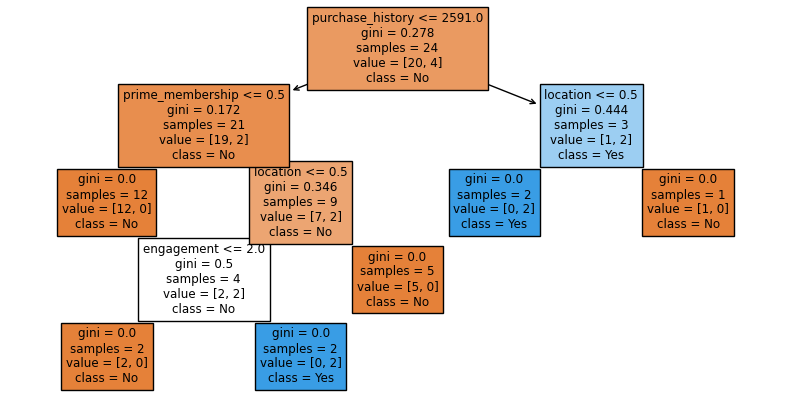

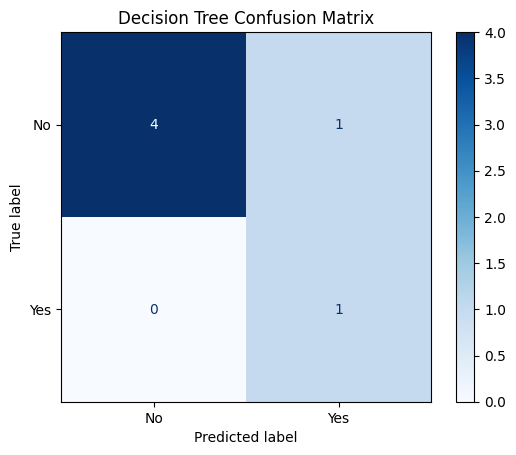

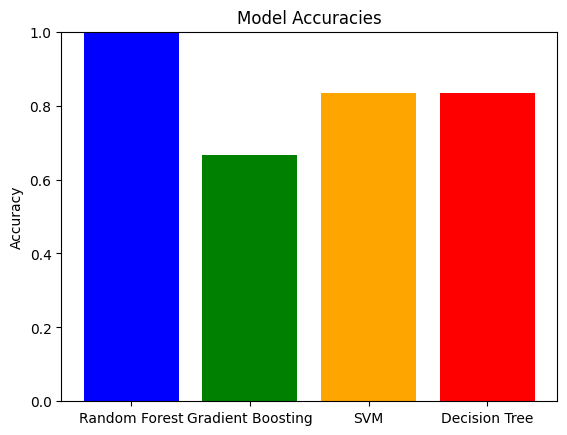

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Build Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Display Decision Tree
plt.figure(figsize=(10, 5))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

# Display Decision Tree Confusion Matrix
dt_conf_matrix = confusion_matrix(y_test, dt_pred, labels=[0, 1])
disp_dt = ConfusionMatrixDisplay(confusion_matrix=dt_conf_matrix, display_labels=['No', 'Yes'])
disp_dt.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Plotting accuracies
models = ['Random Forest', 'Gradient Boosting', 'SVM', 'Decision Tree']
accuracies = [rf_accuracy, gb_accuracy, svm_accuracy, dt_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim([0, 1])
plt.show()


#Predicting Customer Engagement
To give user's recommendation, we have to predict their engagement.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode the 'engagement' column
label_encoder = LabelEncoder()
df['engagement_encoded'] = label_encoder.fit_transform(df['engagement'])

# Select features and target variable
X = df[['prime_membership', 'purchase_history','location','credit_eligible']]
y = df['engagement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.17
Confusion Matrix:
[[0 0 0 1 1]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 1 1 0]
 [0 0 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         0

    accuracy                           0.17         6
   macro avg       0.10      0.07      0.08         6
weighted avg       0.25      0.17      0.20         6



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Random Forest Accuracy: 0.17
Decision Tree Accuracy: 0.17
SVM Accuracy: 0.33


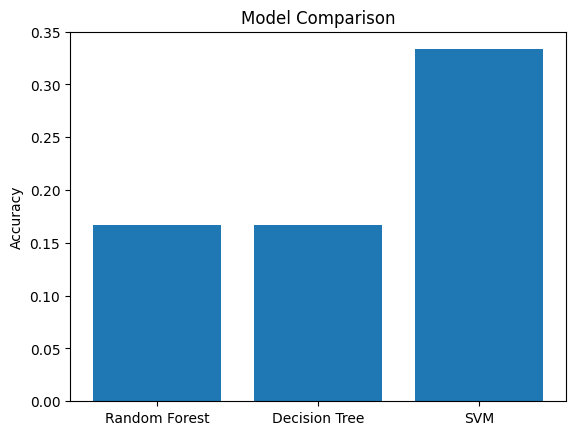

In [6]:
# Encode the 'engagement' column
label_encoder = LabelEncoder()
df['engagement_encoded'] = label_encoder.fit_transform(df['engagement'])

# Select features and target variable
X = df[['prime_membership', 'purchase_history', 'location', 'credit_eligible']]
y = df['engagement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy:.2f}')

# Plotting the accuracies
plt.bar(accuracies.keys(), accuracies.values())
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

Random Forest Accuracy: 0.17
Decision Tree Accuracy: 0.17
SVM (linear) Accuracy: 0.33
SVM (poly) Accuracy: 0.33
SVM (rbf) Accuracy: 0.33
SVM (sigmoid) Accuracy: 0.17


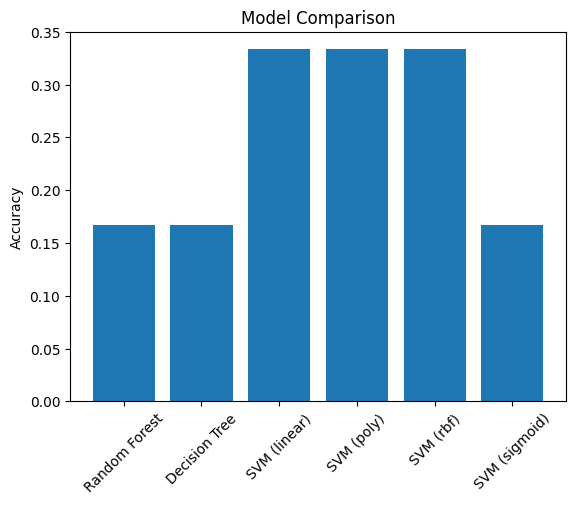

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Encode the 'engagement' column
label_encoder = LabelEncoder()
df['engagement_encoded'] = label_encoder.fit_transform(df['engagement'])

# Select features and target variable
X = df[['prime_membership', 'purchase_history', 'location', 'credit_eligible']]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = df['engagement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42)
}

# Try different SVM kernels
svm_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in svm_kernels:
    model_name = f'SVM ({kernel})'
    models[model_name] = SVC(kernel=kernel, C=1, random_state=42)

# Train and evaluate each model
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy:.2f}')

# Plotting the accuracies
plt.bar(accuracies.keys(), accuracies.values())
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Initialize SVM model
svm_model = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Predictions
svm_predictions = best_svm_model.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'Best SVM Accuracy: {svm_accuracy:.2f}')
print(f'Best SVM Parameters: {best_params}')


Best SVM Accuracy: 0.33
Best SVM Parameters: {'C': 1, 'kernel': 'linear'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming your dataframe is named 'df'
# Features: purchase_history, credit_eligible, location, prime_membership
X = df[['purchase_history', 'credit_eligible', 'location', 'prime_membership']]
# Target: engagement
y = df['engagement']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['credit_eligible', 'location', 'prime_membership'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Hyperparameter tuning using GridSearchCV for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM model
svm_model = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Predictions
svm_predictions = best_svm_model.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'Best SVM Accuracy: {svm_accuracy:.2f}')
print(f'Best SVM Parameters: {best_params}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Features: purchase_history, credit_eligible, location, prime_membership
X = df[['purchase_history', 'credit_eligible', 'location', 'prime_membership']]
# Target: engagement
y = df['engagement']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['credit_eligible', 'location', 'prime_membership'])

# Feature engineering: Creating an interaction feature
X_encoded['purchase_credit_interaction'] = X_encoded['purchase_history'] * X_encoded['credit_eligible_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM model
svm_model = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Predictions
svm_predictions = best_svm_model.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'Best SVM Accuracy: {svm_accuracy:.2f}')
print(f'Best SVM Parameters: {best_params}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
